## 📊 Análisis Exploratorio de Datos (EDA) sobre el Consumo Cultural en España (2021–2023)

Investigar cómo diferentes factores demográficos y económicos influyen en el consumo de productos y servicios culturales en España

In [1]:
import pandas as pd
import numpy as np

#COEFICIENTE PEARSON
from scipy.stats import pearsonr
#ANOVA
from scipy.stats import f_oneway

In [2]:
import sys
import os

# Ruta relativa desde el notebook hasta la carpeta que contiene funciones.py
ruta_funciones = os.path.abspath('src/utils')
if ruta_funciones not in sys.path:
    sys.path.append(ruta_funciones)

from funciones import filtrar, top_bottom, graficar_barplot, grafico_barras_superpuestas, graficar_correlacion, graficar_anova, obtener_categoria_ingresos, mapa_calor

In [3]:
# Cargar  datos
xlsx = pd.ExcelFile("./src/data/datos_tratados.xlsx")

# Cargar cada hoja
libros = xlsx.parse("libros")
espectaculos = xlsx.parse("espectaculos")
educacion = xlsx.parse("educacion")
bys = xlsx.parse("bys")
renta = xlsx.parse("renta")
ingresos = xlsx.parse("ingresos")
caracteristicas = xlsx.parse("caracteristicas")

In [4]:
indicador = "GASTO MEDIO POR PERSONA (Euros)"
libros_pc, periodicos_pc, espect_pc, bys_pc = filtrar(indicador, libros, espectaculos, bys)

In [5]:
# Diccionario para almacenar cada DataFrame
resultados_top_bottom = {}

# Diccionario de entrada con nombre, DataFrame y columna relevante
dict_seleccion = {
    "Libros": (libros_pc, "Total_libros"),
    "Periódicos": (periodicos_pc, "Total_periodicos"),
    "Espectáculos": (espect_pc, "Total_espectaculos"),
    "BYS": (bys_pc, "Total_bys")
}

# Generar DataFrame para cada categoría
for nombre, (df, columna) in dict_seleccion.items():
    df_resultado = top_bottom(df, columna)
    resultados_top_bottom[nombre] = df_resultado.sort_values(by=columna, ascending=False)

In [6]:
resultados_top_bottom["Libros"]

,Comunidad autónoma,Total_libros
6,Castilla y León,51.633333
12,Madrid (Comunidad de),46.866667
16,Rioja (La),46.833333
5,Cantabria,24.200000
4,Canarias,23.566667
0,Andalucía,20.900000


In [7]:
resultados_top_bottom["Periódicos"]

,Comunidad autónoma,Total_periodicos
15,País Vasco,31.366667
14,Navarra (Comunidad Foral de),30.066667
5,Cantabria,18.166667
7,Castilla-La Mancha,4.066667
4,Canarias,3.933333
13,Murcia (Región de),2.900000


In [8]:
resultados_top_bottom["Espectáculos"]

,Comunidad autónoma,Total_espectaculos
3,Balears (Illes),41.833333
14,Navarra (Comunidad Foral de),39.800000
12,Madrid (Comunidad de),36.466667
7,Castilla-La Mancha,15.700000
2,Asturias (Principado de),14.366667
4,Canarias,13.700000


In [9]:
resultados_top_bottom["BYS"]

,Comunidad autónoma,Total_bys
14,Navarra (Comunidad Foral de),60.366667
12,Madrid (Comunidad de),60.366667
16,Rioja (La),50.866667
4,Canarias,26.433333
5,Cantabria,26.033333
7,Castilla-La Mancha,25.466667


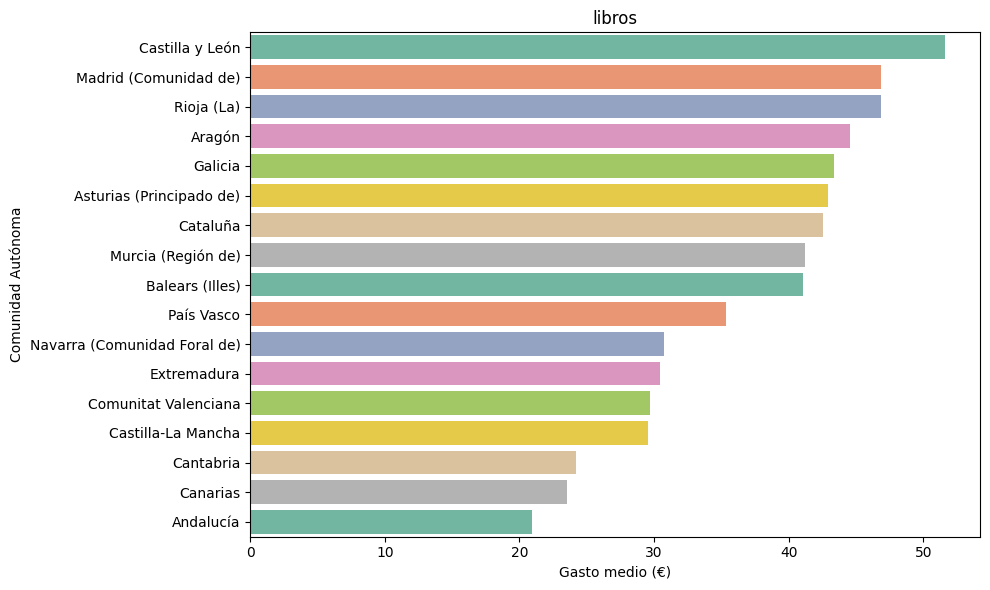

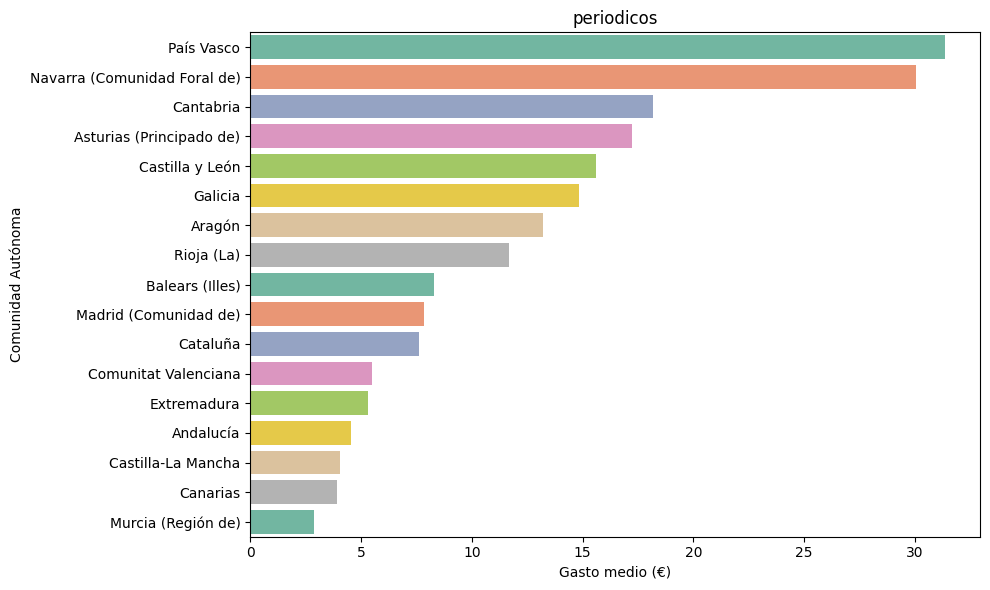

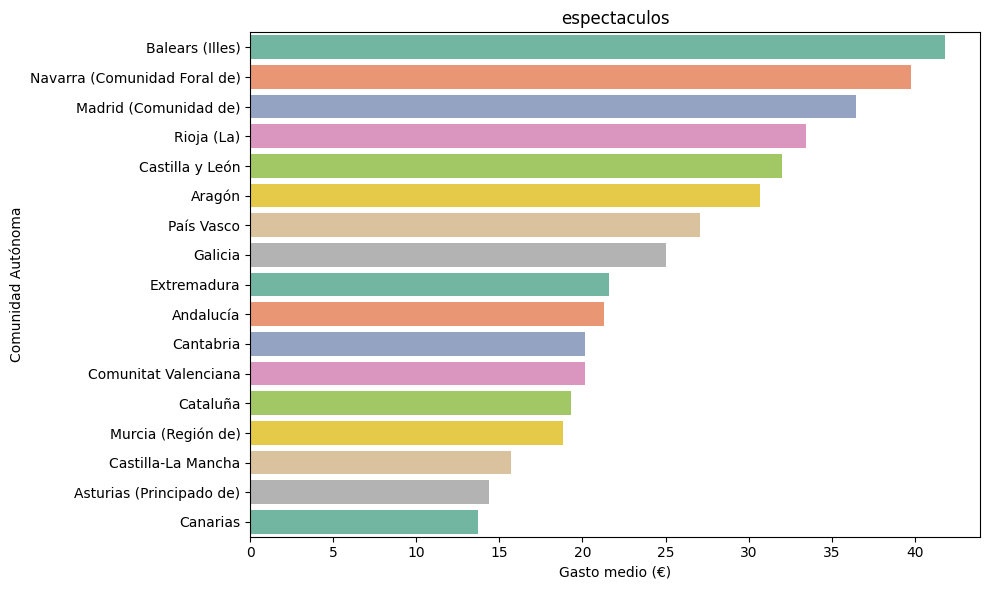

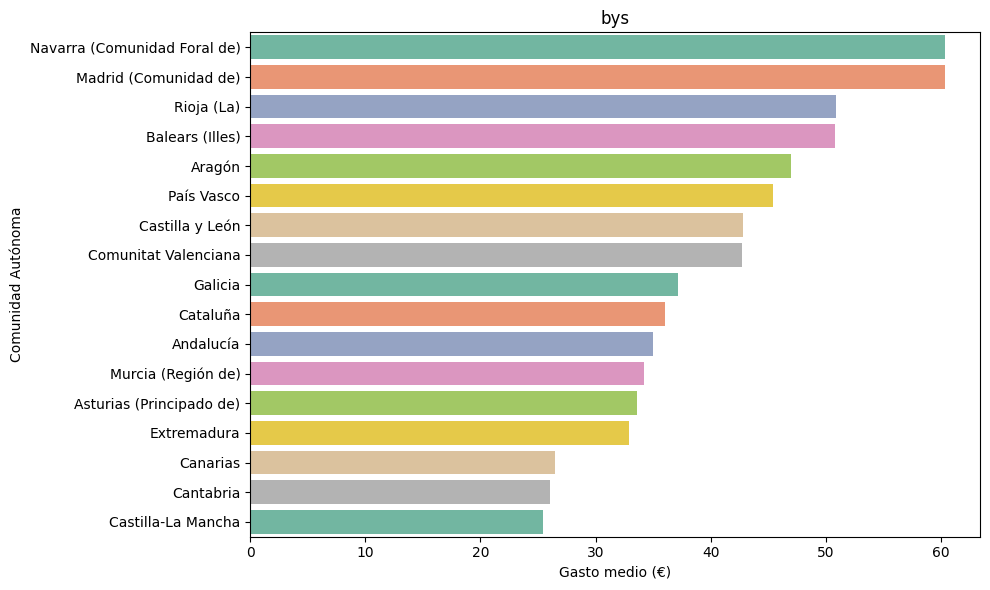

In [10]:
y= "Comunidad autónoma"
for nombre, (df, columna) in dict_seleccion.items():
    graficar_barplot(df, columna, y)

MAYOR GASTO MEDIO POR PERSONA
| LIBROS            | PERIÓDICOS  | ESPECTÁCULOS                              | SERVICIOS CULTURALES | 
| --------------------------- |----- | ----------------------------------------- | -------------- |
| Castilla y Leon <br> Madrid <br> La Rioja  |  País Vasco <br> Navarra <br> Cantabria      | Balears <br> Navarra <br> Madrid|  Navarra <br> Madrid <br> La Rioja |

MENOR GASTO MEDIO POR PERSONA
| LIBROS     | PERIÓDICOS       | ESPECTÁCULOS                              | SERVICIOS CULTURALES | 
| --------------------------- | ---- |----------------------------------------- | --------------------- |
| Andalucía <br> Canarias <br> Cantabria | Murcia <br> Canarias <br> Castilla-La Mancha     | Canarias <br> Asturias <br> Castilla-La Mancha| Castilla-La Mancha <br> Cantabrias <br> Canarias |

**Observaciones Generales:** *Visión general de los hábitos de gasto cultural en diferentes regiones de España*

* Madrid y Navarra aparecen frecuentemente en las categorías de mayor gasto, lo que sugiere una mayor participación y gasto general en actividades culturales en estas regiones.
* Castilla-La Mancha y Canarias aparecen frecuentemente en las categorías de menor gasto, lo que indica una participación o gasto potencialmente menor en estos bienes y servicios culturales.

Existe variabilidad entre las categorías. La proximidad geográfica no necesariamente se correlaciona con los hábitos de gasto, como se observa en las variadas regiones en las listas de mayor y menor gasto para cada categoría.

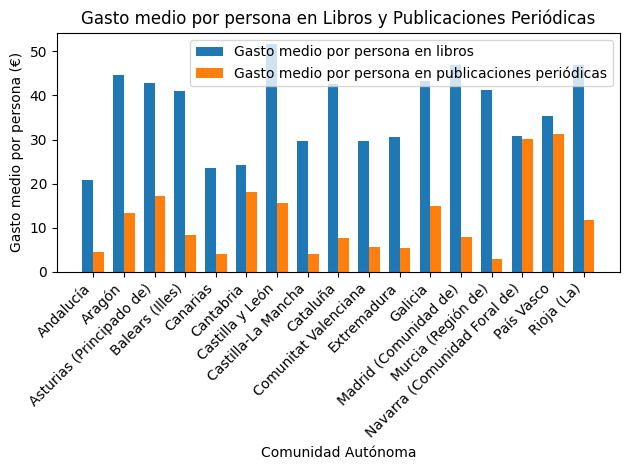

In [11]:
#LIBROS Y PERIODICOS
grafico_barras_superpuestas(libros_pc["Comunidad autónoma"], libros_pc["Total_libros"], periodicos_pc["Total_periodicos"], etiqueta1= "Gasto medio por persona en libros", etiqueta2= "Gasto medio por persona en publicaciones periódicas" )

### Libros y publicaciones periódicas
El consumo cultural en formato impreso varía notablemente entre comunidades. Castilla y León lidera el gasto en libros, mientras que País Vasco y Navarra destacan por un equilibrio casi idéntico entre libros y publicaciones periódicas, lo que sugiere una cultura de lectura más diversificada. En contraste, Andalucía y Canarias muestran un menor gasto en ambos formatos.

### Renta

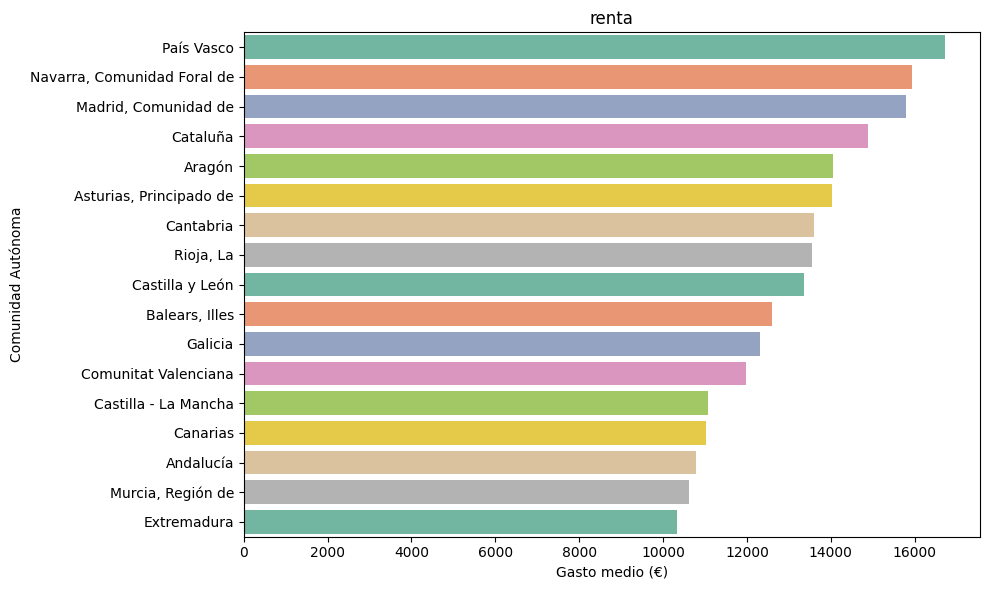

In [12]:
#RENTA
renta_total= renta.groupby(["Comunidad autónoma"])["Total_renta"].mean()
renta_total= renta_total.sort_values(ascending=False)
renta_total = pd.DataFrame(renta_total)

renta_seleccion = top_bottom(renta_total, "Total_renta")
graficar_barplot(renta_total, x="Total_renta", y ="Comunidad autónoma")

Las comunidades con mayor renta neta media por persona (País Vasco, Navarra y Madrid) destacan también en consumo cultural. En concreto, Madrid y Navarra se sitúan en el top 3 en tres de las cuatro categorías culturales analizadas, lo que refuerza la idea de que un mayor nivel de renta se asocia a un mayor gasto o participación en actividades culturales. Este patrón sugiere que el poder adquisitivo es un factor determinante en el acceso y disfrute de la cultura.

## **Hipótesis 1: Educación y consumo cultural**

🎯 *Objetivo*

Analizar si existe relación entre el nivel educativo medio de las comunidades autónomas y su gasto en cultura.

💡 *Hipótesis formal*

H₀ (nula): No hay relación entre el nivel educativo y el gasto en cultura.

H₁ (alternativa): A mayor nivel educativo, mayor gasto en cultura.

In [13]:
edu_sup = educacion[
    (educacion["Nivel de formación alcanzado"] == "Educación superior") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior)") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria, con orientación general")]
edu_pc= edu_sup.groupby("Comunidad autónoma")["Total_educacion"].mean().sort_values(ascending=False).reset_index()
edu_pc= pd.DataFrame(edu_pc)

In [14]:
edu_pc.head()

,Comunidad autónoma,Total_educacion
0,País Vasco,22.065741
1,Madrid (Comunidad de),21.918056
2,Navarra (Comunidad Foral de),20.572685
3,Cantabria,19.962500
4,Asturias (Principado de),18.843056


In [15]:
#DF MERGED
df_merged = libros_pc.merge(periodicos_pc, on="Comunidad autónoma")
df_merged = df_merged.merge(espect_pc, on="Comunidad autónoma")
df_merged = df_merged.merge(bys_pc, on="Comunidad autónoma")
df_gasto_educacion = df_merged.merge(edu_pc, on="Comunidad autónoma", how="inner")
df_gasto_educacion= df_gasto_educacion.sort_values(by="Total_educacion", ascending=False)
df_gasto_educacion

,Comunidad autónoma,Total_libros,Total_periodicos,Total_espectaculos,Total_bys,Total_educacion
14,País Vasco,35.333333,31.366667,27.100000,45.400000,22.065741
11,Madrid (Comunidad de),46.866667,7.866667,36.466667,60.366667,21.918056
13,Navarra (Comunidad Foral de),30.733333,30.066667,39.800000,60.366667,20.572685
5,Cantabria,24.200000,18.166667,20.166667,26.033333,19.962500
2,Asturias (Principado de),42.933333,17.233333,14.366667,33.566667,18.843056
1,Aragón,44.566667,13.233333,30.666667,46.933333,18.841667
7,Cataluña,42.533333,7.633333,19.300000,36.066667,18.799537
4,Canarias,23.566667,3.933333,13.700000,26.433333,18.680556
3,Balears (Illes),41.100000,8.300000,41.833333,50.800000,18.451852
15,Rioja (La),46.833333,11.700000,33.433333,50.866667,18.406019


In [16]:
# P VALOR
gasto_columnas = ['Total_libros', 'Total_periodicos', 'Total_espectaculos', 'Total_bys']

for col in gasto_columnas:
    corr, p = pearsonr(df_gasto_educacion['Total_educacion'], df_gasto_educacion[col])
    print(f"{col}: Correlación = {corr:.2f}, p-valor = {p:.4f}")

Total_libros: Correlación = 0.12, p-valor = 0.6651
Total_periodicos: Correlación = 0.63, p-valor = 0.0086
Total_espectaculos: Correlación = 0.37, p-valor = 0.1552
Total_bys: Correlación = 0.50, p-valor = 0.0509


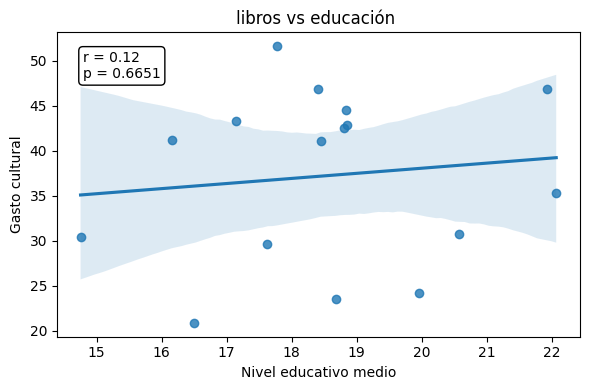

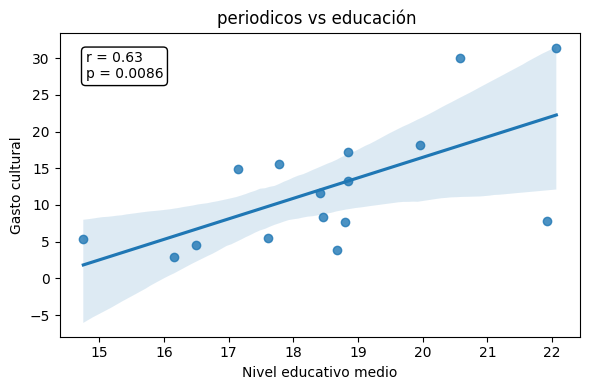

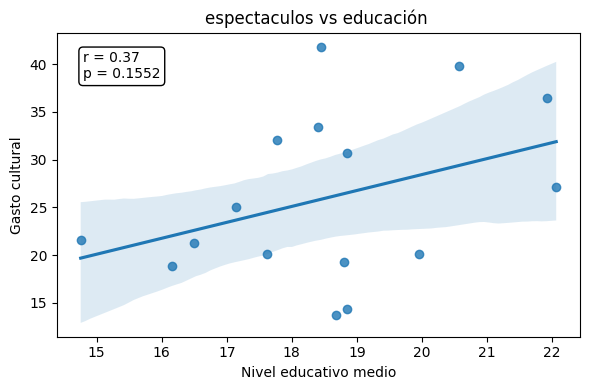

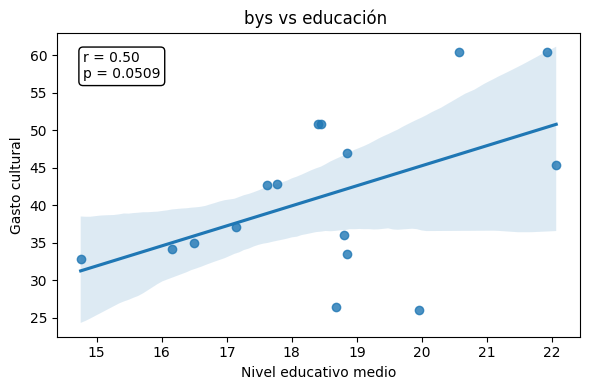

In [17]:
# GRÁFICA
for col in gasto_columnas:
    corr, p = pearsonr(df_gasto_educacion['Total_educacion'], df_gasto_educacion[col])
    graficar_correlacion(df_gasto_educacion, x="Total_educacion", y=col, 
                     titulo= f'{col.replace("Total_","")} vs educación ' ,
                     r=corr, p=p)

In [18]:
top_bottom(edu_pc, "Total_educacion")

,Comunidad autónoma,Total_educacion
0,País Vasco,22.065741
1,Madrid (Comunidad de),21.918056
2,Navarra (Comunidad Foral de),20.572685
16,Extremadura,14.753704
15,Castilla - La Mancha,15.659259
14,Murcia (Región de),16.159259


Las comunidades con mayor nivel de educación superior (País Vasco, Madrid y Navarra) destacan también en consumo cultural. Como hemos comentado anteriormente, Madrid y Navarra se sitúan en el top 3 en tres de las cuatro categorías culturales analizadas, lo que refuerza la idea de que un mayor nivel educativo se asocia a un mayor gasto o participación en actividades culturales. 

Además, el País Vasco, que lidera en gasto medio por persona en consumo de publicaciones periódicas, junto con Navarra, tienen los mayores niveles de educación.

**Conclusión** 

La hipótesis H1 ("la educación influye en el consumo cultural") se confirma parcialmente:

Hay evidencia estadística de que mayor educación está asociada con más asistencia al cine y gasto en periódicos.

Para otras categorías (libros, espectáculos, servicios culturales), la tendencia es positiva pero no alcanza significancia estadística al nivel 0.05.

**CONFIRMACIÓN HIPÓTESIS NULA**: No hay relación estadísticamente significativa entre educación y gasto en cultura en las variables analizadas.

## **Hipótesis 2: Edad media y consumo cultural**

🎯 *Objetivo*

Analizar si existe relación entre la edad  y el consumo cultural. 

💡*Hipótesis formal*

H₀ (nula): No existe relación significativa entre la edad y el consumo cultural.

H₁ (alternativa): Existe una relación significativa entre la edad y el consumo cultural.


In [19]:
car_f= caracteristicas[caracteristicas["Indicador_caracteristicas"] == "GASTO MEDIO POR PERSONA (Euros)"].copy()

car_f['Caracteristicas'] = car_f['Características del sustentador principal'].str.strip()
car_f['Edad'] = car_f['Caracteristicas'].where(car_f['Caracteristicas'].str.startswith('Grupo de edad'))

car_f = car_f[["periodo", "Edad", "Total_caracteristicas"]].dropna()

In [20]:
car_f.head()

,periodo,Edad,Total_caracteristicas
41,2023,Grupo de edad: de 65 años en adelante,180.2
42,2023,Grupo de edad: de 45 a 64 años,230.1
43,2023,Grupo de edad: de 30 a 44 años,281.8
44,2023,Grupo de edad: de 16 a 29 años,356.4
141,2022,Grupo de edad: de 65 años en adelante,181.1


In [21]:
# Agrupar por edad
grupos = [car_f[car_f['Edad'] == edad]['Total_caracteristicas'] for edad in car_f['Edad'].unique()]

# ANOVA
f_stat, p_valor = f_oneway(*grupos)
print(f"F-statistic: {f_stat:.3f}, p-valor: {p_valor:}")

F-statistic: 48.929, p-valor: 1.7192621442180648e-05


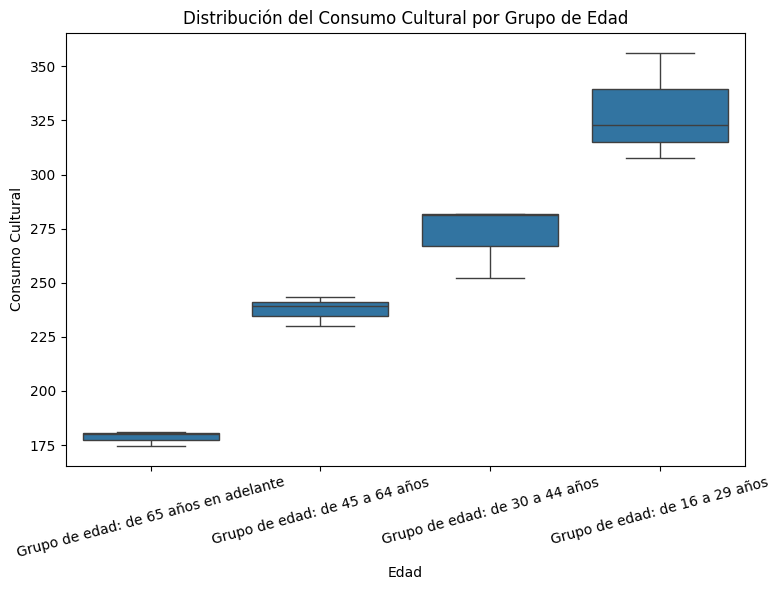

In [22]:
graficar_anova(car_f, x='Edad', y='Total_caracteristicas')

In [23]:
car_media = car_f.groupby('Edad', as_index=False)['Total_caracteristicas'].mean()
car_media

,Edad,Total_caracteristicas
0,Grupo de edad: de 16 a 29 años,328.966667
1,Grupo de edad: de 30 a 44 años,271.800000
2,Grupo de edad: de 45 a 64 años,237.500000
3,Grupo de edad: de 65 años en adelante,178.633333


Se obtuvo un p-valor < 0.05, lo que indica que la relación es estadísticamente significativa. Y el coeficiente de correlación es negativo (r < 0), lo que implica que a mayor edad, menor es el consumo cultural. 

Los grupos más jóvenes (16 a 29 años) presentan un consumo notablemente mayor, mientras que este decrece progresivamente en los grupos de mayor edad.

**CONFIRMACIÓN HIPÓTESIS ALTERNATIVA**: Existe una relación significativa entre edad y consumo cultural

## **Hipótesis 3: A mayores ingresos, mayor gasto cultural**
🎯 *Objetivo*
Contestar: ¿Hay una relación directa entre el nivel de ingresos y el gasto en productos culturales?

💡 *Hipótesis formal*

H₀ (nula): No existe una relación significativa entre el nivel de ingresos y el gasto en productos culturales.

H₁ (alternativa): Existe una relación significativa y positiva entre el nivel de ingresos y el gasto en productos culturales.

In [24]:
ingresos_filtrado1 = ingresos[ingresos["Indicador_ingresos"] == "GASTO MEDIO POR PERSONA (Euros)"]
ingresos_mensuales= ingresos_filtrado1.groupby('Ingresos mensuales en el hogar')['Total_ingresos'].mean().sort_values(ascending=False).reset_index()
ingresos_mensuales.drop(1, inplace=True)

In [25]:
renta["Renta mensual"] = renta["Total_renta"]/12
renta_total= renta.groupby(["Comunidad autónoma"])["Renta mensual"].mean()
renta_total=pd.DataFrame(renta_total)
renta_total= renta_total.reset_index() #tener Comunidad autónoma como columna
renta_total['Categoria'] = renta_total['Renta mensual'].apply(obtener_categoria_ingresos)

In [26]:
#MERGE
resultado = renta_total.merge(ingresos_mensuales, left_on='Categoria', right_on='Ingresos mensuales en el hogar')
resultado = resultado[['Comunidad autónoma', 'Renta mensual', 'Categoria', 'Total_ingresos']]

resultado.sort_values(by="Renta mensual")

,Comunidad autónoma,Renta mensual,Categoria,Total_ingresos
10,Extremadura,861.000000,Menos de 1.000 euros,148.733333
13,"Murcia, Región de",885.472222,Menos de 1.000 euros,148.733333
0,Andalucía,898.250000,Menos de 1.000 euros,148.733333
4,Canarias,918.166667,Menos de 1.000 euros,148.733333
6,Castilla - La Mancha,922.416667,Menos de 1.000 euros,148.733333
9,Comunitat Valenciana,997.722222,Menos de 1.000 euros,148.733333
11,Galicia,1026.444444,Entre 1.000 y 1.499 euros,173.366667
3,"Balears, Illes",1050.694444,Entre 1.000 y 1.499 euros,173.366667
7,Castilla y León,1113.972222,Entre 1.000 y 1.499 euros,173.366667
16,"Rioja, La",1128.750000,Entre 1.000 y 1.499 euros,173.366667


In [27]:
# COEFICIENTE PEARSON
corr, p_valor = pearsonr(resultado['Renta mensual'], resultado['Total_ingresos'])
print(f"Correlación: {corr:.4f}, p-valor: {p_valor:.4f}")

Correlación: 0.8136, p-valor: 0.0001


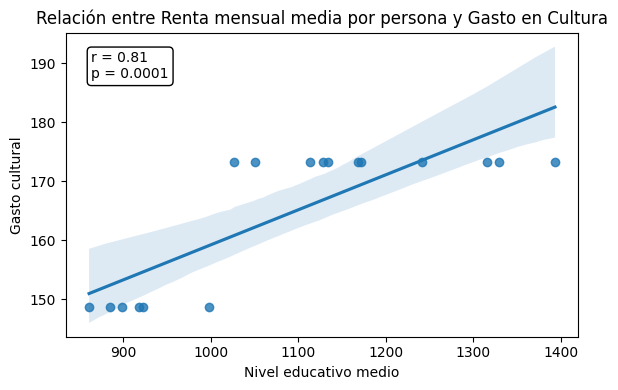

In [28]:
#GRÁFICA
graficar_correlacion(resultado, x="Renta mensual", y="Total_ingresos", titulo= "Relación entre Renta mensual media por persona y Gasto en Cultura", r=0.8136, p=0.0001 )

**Conclusión**

Dado que el p-valor (0.0001) es mucho menor que el nivel de significancia común (α = 0.05), se rechaza la hipótesis nula.

Por lo tanto, hay evidencia estadísticamente significativa para afirmar que existe una relación directa y positiva entre los ingresos y el gasto en productos culturales.

Este resultado respalda la hipótesis de investigación: a mayores ingresos, mayor gasto cultural.

**CONFIRMACIÓN HIPÓTESIS ALTERNATIVA**: Existe una relación significativa y positiva entre el nivel de ingresos y el gasto en productos culturales.

In [29]:
df = df_gasto_educacion.merge(resultado, on="Comunidad autónoma")
df = df.copy()
df.drop(columns=["Comunidad autónoma", "Categoria"],inplace=True)

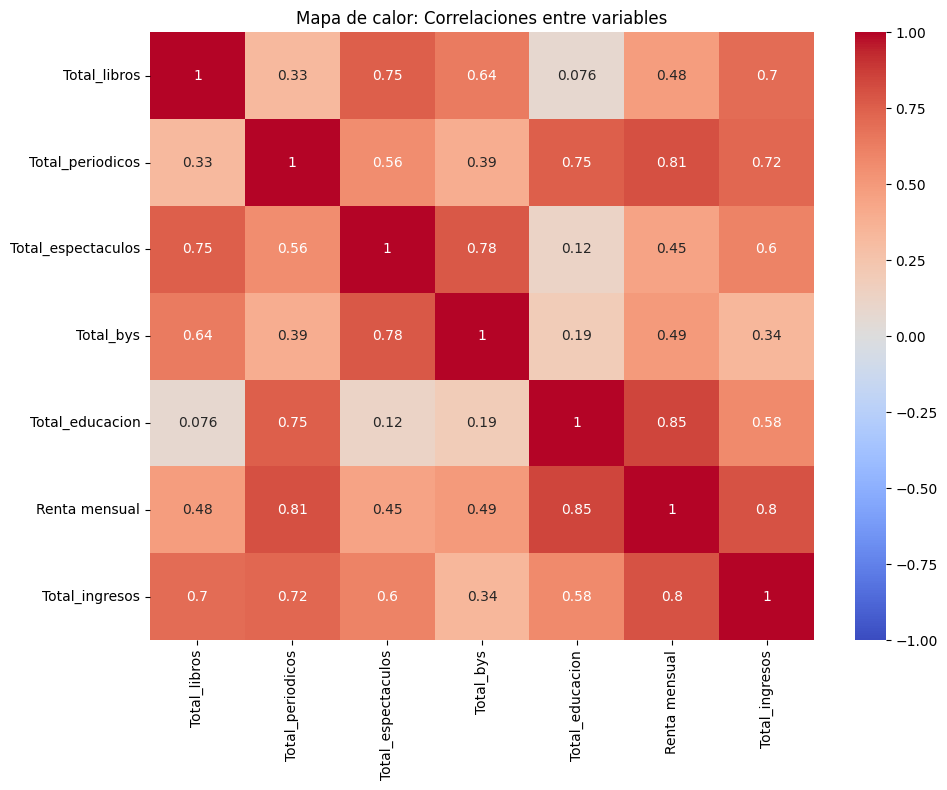

In [30]:
mapa_calor(df)

Renta mensual se relaciona positivamente con todas las variables culturales, lo que sugiere que la capacidad económica es un fuerte impulsor del consumo cultural.